In [1]:
!unzip movies_metadata.csv\ \(1\).zip

Archive:  movies_metadata.csv (1).zip
  inflating: movies_metadata.csv     


In [154]:
import pandas as pd
import json
from collections import defaultdict, Counter
import ast
import matplotlib.pyplot as plt

In [128]:
import pandas as pd
# loading the dataset 
df=pd.read_csv('movies_metadata.csv')

In [129]:
# we want to only keep the columns that are relevant for our task and drop the rest
df = df[['original_title','overview','id','genres']]

In [130]:
# making column containing only the genre names
listofgen = []
for x,y in df['genres'].iteritems():
    y = ast.literal_eval(y)
    allh = []
    for dic in y:
        allh.append(dic['name'])
    listofgen.append(allh)
        
df['gen_name'] = listofgen

In [131]:
df[df['gen_name'].map(lambda d: len(d)) > 0]

,original_title,overview,id,genres,gen_name
0,Toy Story,"Led by Woody, Andy's toys live happily in his ...",862,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","[Animation, Comedy, Family]"
1,Jumanji,When siblings Judy and Peter discover an encha...,8844,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[Adventure, Fantasy, Family]"
2,Grumpier Old Men,A family wedding reignites the ancient feud be...,15602,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...","[Romance, Comedy]"
3,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",31357,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","[Comedy, Drama, Romance]"
4,Father of the Bride Part II,Just when George Banks has recovered from his ...,11862,"[{'id': 35, 'name': 'Comedy'}]",[Comedy]
5,Heat,"Obsessive master thief, Neil McCauley leads a ...",949,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...","[Action, Crime, Drama, Thriller]"
6,Sabrina,An ugly duckling having undergone a remarkable...,11860,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...","[Comedy, Romance]"
7,Tom and Huck,"A mischievous young boy, Tom Sawyer, witnesses...",45325,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[Action, Adventure, Drama, Family]"
8,Sudden Death,International action superstar Jean Claude Van...,9091,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[Action, Adventure, Thriller]"
9,GoldenEye,James Bond must unmask the mysterious head of ...,710,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...","[Adventure, Action, Thriller]"


In [150]:
a=df.gen_name.values
ab= [item for sublist in a for item in sublist]

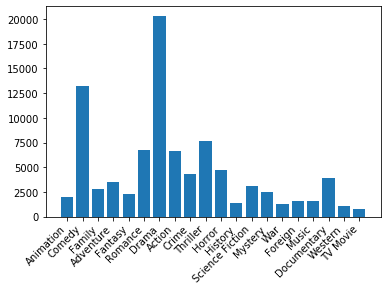

In [165]:
count_of= Counter(ab)
count_of = {k:v for k,v in count_of.items() if v !=1}
fig, ax = plt.subplots()
plt.bar(count_of.keys(), count_of.values())
# Rotate 45 degrees 
plt.setp( ax.xaxis.get_majorticklabels(), rotation=45, ha="right" )
plt.gcf().subplots_adjust(bottom=0.15)
plt.show()


In [91]:

unique_genres = []
genre_dict_counts = defaultdict(int)
genre_per_movie = []
for genre in genre_list:
    genre = ast.literal_eval(genre)
    
    #genre = genre.strip('][').split(', ') 
    #gen = json.loads(genre)
    #print(genre)
    small_gen = []
    for dic in genre:
        #if dic['name'] not in unique_genres:
        #    unique_genres.append(dic['name'])
        if dic['name'] not in genre:
            genre_dict_counts[dic['name']] += 1
        else:
            genre_dict_counts[dic['name']] = 1
           
            

In [93]:
genre_dict_counts = {key:val for key,val in genre_dict_counts.items() if val != 1}

In [94]:
genre_dict_counts

{'Animation': 1935,
 'Comedy': 13182,
 'Family': 2770,
 'Adventure': 3496,
 'Fantasy': 2313,
 'Romance': 6735,
 'Drama': 20265,
 'Action': 6596,
 'Crime': 4307,
 'Thriller': 7624,
 'Horror': 4673,
 'History': 1398,
 'Science Fiction': 3049,
 'Mystery': 2467,
 'War': 1323,
 'Foreign': 1622,
 'Music': 1598,
 'Documentary': 3932,
 'Western': 1042,
 'TV Movie': 767}

In [80]:
weird_genres = ['TV Movie', 'Carousel Productions', 'Vision View Entertainment',
 'Telescene Film Group Productions', 'Aniplex', 'GoHands',
 'BROSTA TV', 'Mardock Scramble Production Committee', 'Sentai Filmworks',
 'Odyssey Media', 'Pulser Productions', 'Rogue State', 'The Cartel']